In [1]:
import pandas as pd
import scanpy as sc
import itertools
import anndata
import itertools
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
from sklearn.preprocessing import normalize
from itertools import product
import umap
from collections import Counter
from sklearn.decomposition import PCA
import gridot
import schema
from gridot.utils import *

In [2]:
from gridot.utils import *

In [3]:
atac_adata = sc.read_h5ad('./data/atac_kidney_control1_lda_3celltypes.h5ad')
atac_adata

AnnData object with n_obs × n_vars = 1493 × 116859
    obs: 'barcode', 'patient', 'disease', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'pct_reads_in_peaks', 'UMAP_1', 'UMAP_2', 'n_genes'
    var: 'peaks', 'chr_no', 'start', 'end', 'Chromosome', 'Start', 'End', 'n_cells'
    obsm: 'X_lda'

In [4]:
rna_adata = sc.read_h5ad('./data/rna_data_filtered_pca_1control_3cells.h5ad')
rna_adata

AnnData object with n_obs × n_vars = 1694 × 4334
    obs: 'name', 'barcode', 'patient', 'gender', 'disease', 'celltype', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
sc.pp.filter_cells(rna_adata, min_genes=200)
sc.pp.filter_genes(rna_adata, min_cells=3)
rna_adata.obs.columns = rna_adata.obs.columns.astype(str)
rna_adata.var.columns = rna_adata.var.columns.astype(str)

rna_adata

AnnData object with n_obs × n_vars = 1693 × 4334
    obs: 'name', 'barcode', 'patient', 'gender', 'disease', 'celltype', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
sc.pp.filter_cells(atac_adata, min_genes=200)
sc.pp.filter_genes(atac_adata, min_cells=3)

atac_adata

AnnData object with n_obs × n_vars = 1493 × 116859
    obs: 'barcode', 'patient', 'disease', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'pct_reads_in_peaks', 'UMAP_1', 'UMAP_2', 'n_genes'
    var: 'peaks', 'chr_no', 'start', 'end', 'Chromosome', 'Start', 'End', 'n_cells'
    obsm: 'X_lda'

In [7]:
rna = rna_adata.obsm['X_pca']
rna.shape

(1693, 50)

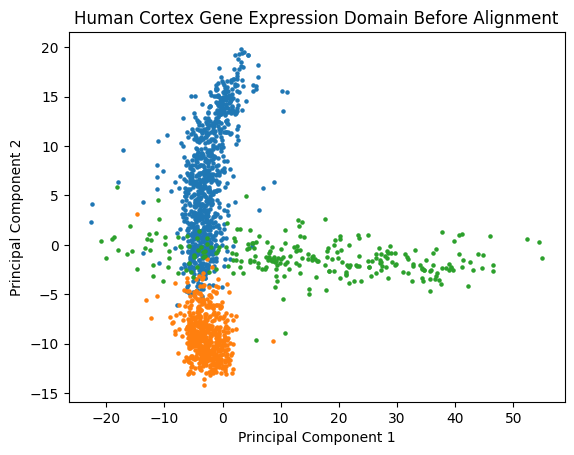

In [8]:
import numpy as np
from sklearn.decomposition import PCA
# Sample label array (replace with your own label array)
label_array = np.array(rna_adata.obs['celltype'].to_list())

# Get unique labels
unique_labels = np.unique(label_array)
rna_pca=PCA(n_components=2)
Xrna_2Dpca=rna_pca.fit_transform(rna)
# Plot PCA-transformed data with labels
plt.figure()

# Plot each unique label separately
for lab in unique_labels:
    mask = (label_array == lab)
    plt.scatter(Xrna_2Dpca[mask, 0], Xrna_2Dpca[mask, 1], s=5, label=lab)

# plt.legend(loc='best', shadow=False)
plt.title('Human Cortex Gene Expression Domain Before Alignment')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [9]:
sc.pp.filter_cells(atac_adata, min_genes=200)
sc.pp.filter_genes(atac_adata, min_cells=3)
atac_adata

AnnData object with n_obs × n_vars = 1493 × 116859
    obs: 'barcode', 'patient', 'disease', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'pct_reads_in_peaks', 'UMAP_1', 'UMAP_2', 'n_genes'
    var: 'peaks', 'chr_no', 'start', 'end', 'Chromosome', 'Start', 'End', 'n_cells'
    obsm: 'X_lda'

In [10]:
atac = atac_adata.obsm['X_lda']
atac

array([[0.00089928, 0.00359712, 0.00089928, ..., 0.0044964 , 0.00359712,
        0.00179856],
       [0.00160256, 0.00320513, 0.00320513, ..., 0.00080128, 0.00080128,
        0.00160256],
       [0.00100671, 0.00134228, 0.0045302 , ..., 0.00083893, 0.00100671,
        0.00033557],
       ...,
       [0.00058264, 0.00174791, 0.00077685, ..., 0.00563216, 0.00524374,
        0.0015537 ],
       [0.00080928, 0.00242784, 0.00053952, ..., 0.00107904, 0.00755328,
        0.0013488 ],
       [0.00062854, 0.00345695, 0.00157134, ..., 0.00078567, 0.00329981,
        0.00502828]])

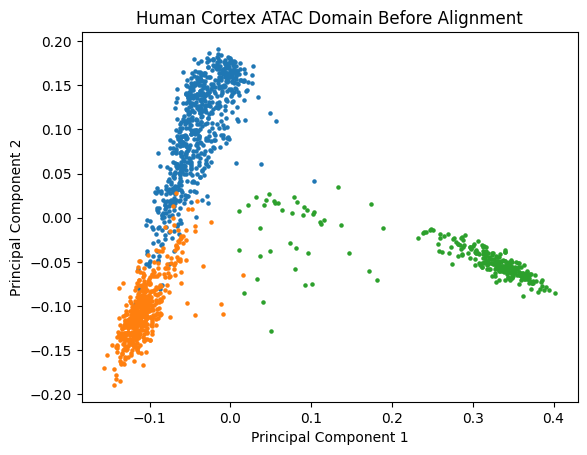

In [11]:
import numpy as np

# Sample label array (replace with your own label array)
label_array_atac = np.array(atac_adata.obs['celltype'].to_list())

# Get unique labels
unique_labels = np.unique(label_array_atac)
pca=PCA(n_components=2)
Yatac_2Dpca=pca.fit_transform(atac)
# Plot PCA-transformed data with labels
plt.figure()

# Plot each unique label separately
for lab in unique_labels:
    mask = (label_array_atac == lab)
    plt.scatter(Yatac_2Dpca[mask, 0], Yatac_2Dpca[mask, 1], s=5, label=lab)

# plt.legend(loc='best', shadow=False)
plt.title('Human Cortex ATAC Domain Before Alignment')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [12]:
rna = normalize(rna)

In [13]:
atac = normalize(atac)

In [14]:
import numpy as np
from sklearn.preprocessing import normalize
print("Dimensions of input datasets are: ", "X(rna)= ", rna.shape, " Y(atac)= ", atac.shape)

Dimensions of input datasets are:  X(rna)=  (1693, 50)  Y(atac)=  (1493, 50)


In [15]:
from scotplus.utils.alignment import compute_graph_distances
D_rna = compute_graph_distances(rna.astype('float32'), n_neighbors=50, mode='connectivity')
D_atac = compute_graph_distances(atac.astype('float32'), n_neighbors=50, mode='connectivity')

In [16]:
from scotplus.solvers import SinkhornSolver
from sklearn.preprocessing import normalize
import matplotlib.pylab as plt
from sklearn.decomposition import PCA

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [17]:
atac_adata.shape

(1493, 116859)

In [18]:
from scotplus.utils.alignment import get_barycentre

scot = SinkhornSolver(tol_uot=1e-5, nits_uot=500, nits_bcd=20,device=device)
pi_samp,_,pi_feat = scot.ugw(D_rna,D_atac, rho = (0.05, 0.05), eps = 1e-4, verbose = True,device=device) #RNA on to atac
pi_samp = pi_samp.cpu()
aligned_rna = get_barycentre(torch.tensor(atac,dtype = torch.float32), (pi_samp.cpu()))



BCD Iteration 1 - Loss: 0.037455, 0.037775
BCD Iteration 2 - Loss: 0.023315, 0.023999
BCD Iteration 3 - Loss: 0.021901, 0.022719
BCD Iteration 4 - Loss: 0.021419, 0.022260
BCD Iteration 5 - Loss: 0.021033, 0.021886
BCD Iteration 6 - Loss: 0.020943, 0.021805
BCD Iteration 7 - Loss: 0.020919, 0.021786
BCD Iteration 8 - Loss: 0.020909, 0.021779
BCD Iteration 9 - Loss: 0.020904, 0.021776
BCD Iteration 10 - Loss: 0.020901, 0.021775
BCD Iteration 11 - Loss: 0.020900, 0.021774


In [19]:
from gridot.utils import transfer_accuracy

In [20]:
transfer_accuracy(aligned_rna,atac,label_array,label_array_atac,5)

0.6556408741878322

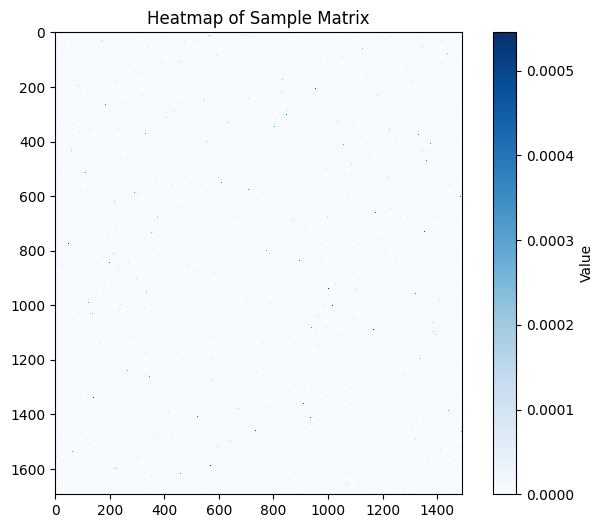

In [21]:
# plot a corner of the heatmap to get a sense for density
plt.figure(figsize=(8, 6))
plt.imshow(pi_samp.cpu(), cmap='Blues', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Heatmap of Sample Matrix')
plt.show()

In [22]:
from scotplus.utils.alignment import get_barycentre
aligned_rna = get_barycentre(torch.tensor(atac,dtype = torch.float32), (pi_samp.cpu()))
atac.shape, aligned_rna.shape

((1493, 50), torch.Size([1693, 50]))

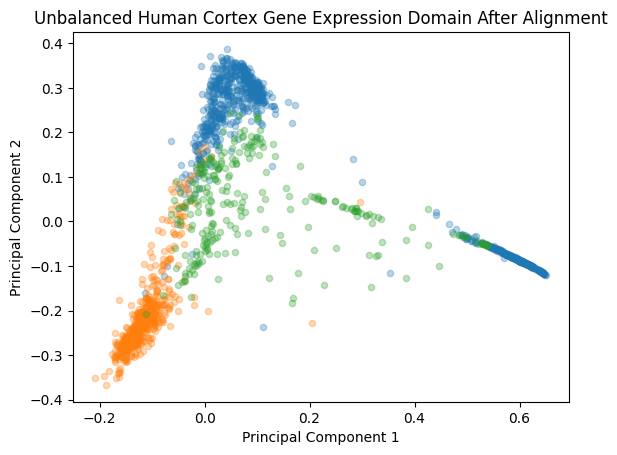

In [23]:
Xrna_integrated=atac
Yatac_subsamp_integrated=aligned_rna
concatenated=np.concatenate((Xrna_integrated,Yatac_subsamp_integrated), axis=0)

concatenated_pc=pca.transform(concatenated)
Xrna_integrated_pc=concatenated_pc[0:Xrna_integrated.shape[0],:]
Yatac_subsamp_integrated_pc=concatenated_pc[Xrna_integrated.shape[0]:,:]

x_labels = np.array(label_array_atac)
concat_labels = np.concatenate((label_array_atac,label_array),axis=0)
concat_pc = np.concatenate((Xrna_integrated_pc,Yatac_subsamp_integrated_pc), axis=0)
for label in unique_labels:
    mask = (label_array == label)
    plt.scatter(Yatac_subsamp_integrated_pc[mask, 0], Yatac_subsamp_integrated_pc[mask, 1], s=20, alpha=0.3, label = label)
    
    
plt.title('Unbalanced Human Cortex Gene Expression Domain After Alignment')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [25]:
test_atac = pseudo_atac_generation(atac_adata.X,torch.tensor(pi_samp, dtype=torch.float32), 20,threshold = 0.1)


In [26]:
print(np.sum(test_atac))


23522567


In [27]:

new_atac = pseudo_atac_generation(atac_adata.X,torch.tensor(pi_samp, dtype=torch.float32), 20,threshold = 0.1)

### preprocessing atac seq
atac_adata.var.index = atac_adata.var.index.astype(str)
atac_adata.var.columns = atac_adata.var.columns.astype(str)
projected_atac =  sc.AnnData(new_atac,
                      var = atac_adata.var,
                      obs = rna_adata.obs[['celltype']]
                      )

sc.pp.filter_cells(projected_atac, min_genes=200) #filter out cells that express less than 200 genes and genes expressed in less than 3 cells
sc.pp.filter_genes(projected_atac, min_cells=3)
projected_atac.obs['orig.ident'] = projected_atac.obs.index
projected_atac.var['features'] = projected_atac.var.index


projected_atac.var[['chr_no', 'start','end']] = projected_atac.var['features'].str.split('-|:', expand=True)
projected_atac.write_h5ad('./data/pseudo_atac_20_0.1.h5ad'


In [29]:
projected_atac

AnnData object with n_obs × n_vars = 1693 × 116859
    obs: 'celltype', 'n_genes', 'orig.ident'
    var: 'peaks', 'chr_no', 'start', 'end', 'Chromosome', 'Start', 'End', 'n_cells', 'features'

In [30]:
projected_atac = sc.read_h5ad('./data/pseudo_atac_20_0.1.h5ad')
projected_atac

AnnData object with n_obs × n_vars = 1693 × 116859
    obs: 'celltype', 'n_genes', 'orig.ident'
    var: 'peaks', 'chr_no', 'start', 'end', 'Chromosome', 'Start', 'End', 'n_cells', 'features'